In [1]:
# Importing
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
diabetics = load_diabetes()

# Create the dataframe
column_name = diabetics.feature_names
df_diabetics = pd.DataFrame(diabetics.data)
df_diabetics.columns = column_name
print(df_diabetics.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


<Axes: >

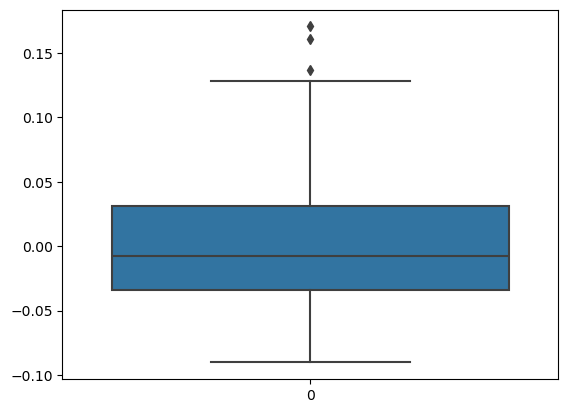

In [2]:
# Box Plot
import seaborn as sns
sns.boxplot(df_diabetics['bmi'])


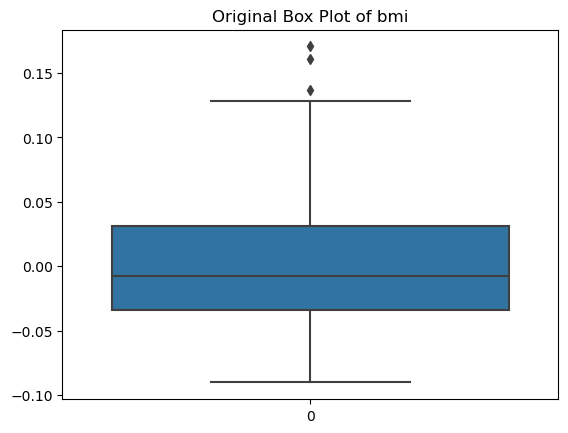

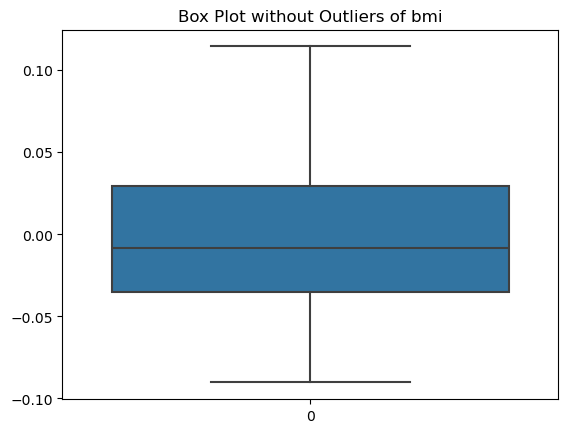

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


def removal_box_plot(df, column, threshold):
	sns.boxplot(df[column])
	plt.title(f'Original Box Plot of {column}')
	plt.show()

	removed_outliers = df[df[column] <= threshold]

	sns.boxplot(removed_outliers[column])
	plt.title(f'Box Plot without Outliers of {column}')
	plt.show()
	return removed_outliers


threshold_value = 0.12

no_outliers = removal_box_plot(df_diabetics, 'bmi', threshold_value)


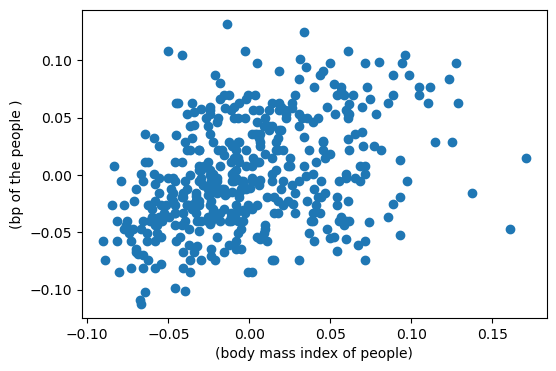

In [4]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df_diabetics['bmi'], df_diabetics['bp'])
ax.set_xlabel('(body mass index of people)')
ax.set_ylabel('(bp of the people )')
plt.show()


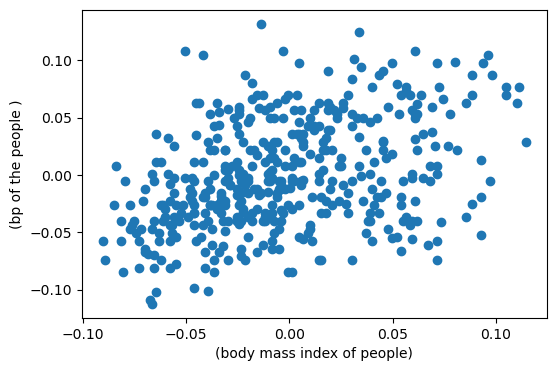

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

outlier_indices = np.where((df_diabetics['bmi'] > 0.12) & (df_diabetics['bp'] < 0.8))

no_outliers = df_diabetics.drop(outlier_indices[0])

# Scatter plot without outliers
fig, ax_no_outliers = plt.subplots(figsize=(6, 4))
ax_no_outliers.scatter(no_outliers['bmi'], no_outliers['bp'])
ax_no_outliers.set_xlabel('(body mass index of people)')
ax_no_outliers.set_ylabel('(bp of the people )')
plt.show()


In [6]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_diabetics['age']))
print(z)


0      0.800500
1      0.039567
2      1.793307
3      1.872441
4      0.113172
         ...   
437    0.876870
438    0.115937
439    0.876870
440    0.956004
441    0.956004
Name: age, Length: 442, dtype: float64


In [7]:
import numpy as np

threshold_z = 2

outlier_indices = np.where(z > threshold_z)[0]
no_outliers = df_diabetics.drop(outlier_indices)
print("Original DataFrame Shape:", df_diabetics.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)


Original DataFrame Shape: (442, 10)
DataFrame Shape after Removing Outliers: (426, 10)


In [8]:
# IQR
Q1 = np.percentile(df_diabetics['bmi'], 25, method='midpoint')
Q3 = np.percentile(df_diabetics['bmi'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)


0.06520763046978838


In [9]:
# Above Upper bound
upper = Q3+1.5*IQR
upper_array = np.array(df_diabetics['bmi'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())

# Below Lower bound
lower = Q1-1.5*IQR
lower_array = np.array(df_diabetics['bmi'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())


Upper Bound: 0.12879000811776306
3
Lower Bound: -0.13204051376139045
0


In [10]:
# Importing
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the dataset
diabetes = load_diabetes()

# Create the dataframe
column_name = diabetes.feature_names
df_diabetes = pd.DataFrame(diabetes.data)
df_diabetes .columns = column_name
df_diabetes .head()
print("Old Shape: ", df_diabetes.shape)

''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = df_diabetes['bmi'].quantile(0.25)
Q3 = df_diabetes['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df_diabetes['bmi'] >= upper)[0]
lower_array = np.where(df_diabetes['bmi'] <= lower)[0]

# Removing the outliers
df_diabetes.drop(index=upper_array, inplace=True)
df_diabetes.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df_diabetes.shape)


Old Shape:  (442, 10)
New Shape:  (439, 10)
